In [1]:
%load_ext autoreload
%autoreload 2


import uproot
import awkward as ak

import matplotlib.pylab as plt
import numpy as np

import time

from hist import Hist

import babar_analysis_tools as bat

import pandas as pd

from analysis_variables import *

import os

In [3]:
start = time.time()

# At Siena
#topdir = '/mnt/qnap/babar_data/bnv_plambda'
# At Siena on villa-straylight
#topdir = '/home/bellis/'

# At Bellis' home
topdir = '/home/bellis/babar_data/bnv_plambda'

# On Bellis' laptop
#topdir = './'

#filename = f'{topdir}/Background_SP_modes_Only_Run_1.parquet'
filename = f'{topdir}/Background_and_signal_SP_modes_Only_Run_1.parquet'

data = ak.from_parquet(filename)

print(f"Took {time.time() - start} s")


Took 0.8630349636077881 s


In [4]:
x = data['spmode']

type(x)

#ak.to_numpy(x)

awkward.highlevel.Array

-----------------------
0 0.0 1196.0
1 225.0 58140.0
2 58971.0 294.0
3 67.0 3.0
4 366.0 0.0
5 0.0 0.0
6 4.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0

-999   58971.0  662.0   59633.0 98.89% 1.11%

-999   58140.0  1493.0  59633.0  97.50% 2.50%

-----------------------
0 0.0 1755.0
1 823.0 23718.0
2 24384.0 171.0
3 40.0 3.0
4 392.0 0.0
5 2.0 0.0
6 6.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0

998    24384.0  1263.0   25647.0 95.08% 4.92%

998    23718.0  1929.0  25647.0  92.48% 7.52%

-----------------------
0 0.0 1259.0
1 634.0 14317.0
2 14807.0 283.0
3 34.0 4.0
4 377.0 0.0
5 1.0 0.0
6 8.0 0.0
7 0.0 0.0
8 2.0 0.0
9 0.0 0.0
10 0.0 0.0

1005   14807.0  1056.0   15863.0 93.34% 6.66%

1005   14317.0  1546.0  15863.0  90.25% 9.75%

-----------------------
0 0.0 51.0
1 30.0 179.0
2 188.0 2.0
3 8.0 0.0
4 4.0 0.0
5 1.0 0.0
6 1.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0

1235   188.0  44.0   232.0 81.03% 18.97%

1235   179.0  53.0  232.0  77.16% 22.84%

-----------------------
0 0.0 5

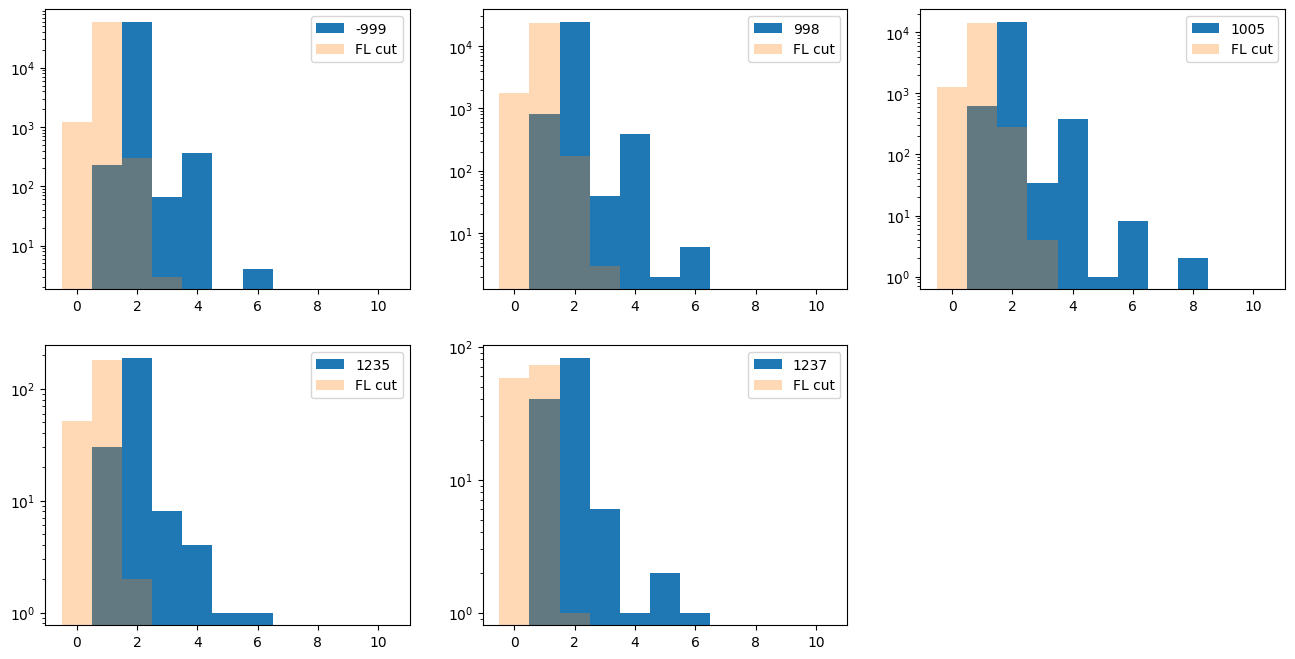

In [5]:
spmodes = ['-999', '998', '1005', '1235', '1237']

plt.figure(figsize=(16,8))
for i,spmode in enumerate(spmodes):

    print("-----------------------")
    
    mask = data['spmode']==spmode
    fl = data[mask]['Lambda0FlightLen']

    maskfl = fl>=0
    #x = ak.num(data[mask]['Lambda0_unc_Mass'])
    x = ak.num(data[mask]['BMass'])

    xflcut = ak.num(data[mask]['BMass'][maskfl])

    plt.subplot(2,3,i+1)
    h = plt.hist(x,bins=11,range=(-0.5,10.5), label=spmode)
    hflcut = plt.hist(xflcut,bins=11,range=(-0.5,10.5), label='FL cut', alpha=0.3)

    plt.yscale('log')
    plt.legend()
    
    vals = h[0]
    valsflcut = hflcut[0]
    for i in range(len(vals)):
        print(i,vals[i],valsflcut[i])
    
    print()
    n2 = vals[2]
    nother = sum(vals[0:2]) + sum(vals[3:]) 
    print(f"{spmode:6s} {n2}  {nother}   {n2+nother} {100*n2/(n2+nother):.2f}% {100*nother/(n2+nother):.2f}%")
    print()
    n1 = valsflcut[1]
    nother = sum(valsflcut[0:1]) + sum(valsflcut[2:]) 
    print(f"{spmode:6s} {n1}  {nother}  {n1+nother}  {100*n1/(n1+nother):.2f}% {100*nother/(n1+nother):.2f}%")
    print()


# Function to study duplicates

In [6]:
# Check nBs versus nLams
#plt.figure(figsize=(16,12))
for i,spmode in enumerate(spmodes):

    print("-----------------------")
    
    #spmode = '1005'
    mask = data['spmode']==spmode
    x = ak.num(data[mask]['Lambda0_unc_Mass'])
    y = ak.num(data[mask]['BMass'])

    nTrue = len(x[x==y])
    nFalse = len(x[x!=y])

    print(f"{spmode:6s} {nTrue:8d} {nFalse:8d}")

    '''
    plt.subplot(3,2,i+1)
    h = plt.hist(x,bins=11,range=(-0.5,10.5), label=spmode)
    plt.yscale('log')
    plt.legend()
    
    vals = h[0]
    for i in range(len(vals)):
        print(i,vals[i])
    
    print()
    n2 = vals[2]
    nother = sum(vals[0:2]) + sum(vals[3:]) 
    print(f"{spmode:6s} {n2}  {nother}    {100*nother/n2:.2f}%")
    '''
#plt.legend()

-----------------------
-999        226    59407
-----------------------
998         825    24822
-----------------------
1005        640    15223
-----------------------
1235         32      200
-----------------------
1237         40       92


In [7]:
def spherical_to_cartesian(p3_spher):
    r = p3_spher[0]
    costh = p3_spher[1]
    phi = p3_spher[2]
    
    #print(p3_spher)
    #print(costh)
    theta = np.arccos(costh)

    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)

    pmag = np.sqrt(x**2 + y**2 + z**2)
    print(pmag, r)

    return x,y,z, pmag

def mass_from_spherical(p4s_spherical):

    etot,px,py,pz = 0,0,0,0
    
    for p4s_sph in p4s_spherical:
        #print("Here")
        #print(p4s_sph, p4s_sph[1:])
        x,y,z,pmag = spherical_to_cartesian(p4s_sph[1:])
        mass = p4s_sph[0]
        e = np.sqrt(mass**2 + pmag**2)
        
        etot += e
        px += x
        py += y
        pz += z

    #print("p4: ", etot, px, py, pz)
    m2 = etot**2 - (px**2 + py**2 + pz**2)
    if m2>=0:
        return np.sqrt(m2)
    else:
        return -np.sqrt(-m2)
    



In [37]:
output = ""
for f in data.fields:
    if f.find('light')<0:
        continue
        
    if len(output)<80:
        output += f"{f:16s} "
    else:
        print(output)
        output = f"{f:16s} "

B_con_postFitFlight B_con_postFitFlightSignificance BpostFitFlight   BpostFitFlightSignificance 
Lambda0FlightBSCosA Lambda0FlightBSErr Lambda0FlightBSLen Lambda0FlightCosA Lambda0FlightErr 


In [55]:
def duplicate_issue_summary(data, spmode, number_of_Bs=2):
    
    mask = data['spmode']==spmode
    
    lamd1idx = data[mask]['Lambda0d1Idx']
    lamd2idx = data[mask]['Lambda0d2Idx']

    lamd1lund = data[mask]['Lambda0d1Lund']
    lamd2lund = data[mask]['Lambda0d2Lund']

    lamp3 = data[mask]['Lambda0p3']
    lamcosth = data[mask]['Lambda0costh']
    lamphi = data[mask]['Lambda0phi']
    lammass = data[mask]['Lambda0_unc_Mass']

    lamvx = data[mask]['Lambda0Vtxx']
    lamvy = data[mask]['Lambda0Vtxy']
    lamvz = data[mask]['Lambda0Vtxz']

    lamfl = data[mask]['Lambda0FlightLen']

    Bvx = data[mask]['B_con_Vtxx']
    Bvy = data[mask]['B_con_Vtxy']
    Bvz = data[mask]['B_con_Vtxz']
    
    pp3 = data[mask]['pp3']
    pcosth = data[mask]['pcosth']
    pphi = data[mask]['pphi']
    ptrkidx = data[mask]['pTrkIdx']

    pip3 = data[mask]['pip3']
    picosth = data[mask]['picosth']
    piphi = data[mask]['piphi']
    pitrkidx = data[mask]['piTrkIdx']

    trkp3 = data[mask]['TRKp3']
    trkcosth = data[mask]['TRKcosth']
    trkphi = data[mask]['TRKphi']

    
    BMass = data[mask]['BMass']

    
    Bd1idx = data[mask]['Bd1Idx']
    Bd2idx = data[mask]['Bd2Idx']

    Bd1lund = data[mask]['Bd1Lund']
    Bd2lund = data[mask]['Bd2Lund']

    nBs = ak.num(data[mask]['BMass'])

    #print(nBs)
    
    # Find the first instance when the number of Bs is what was passed in
    indices = ak.where(nBs==number_of_Bs)
    idx = indices[0][0]

    print(f"{spmode}")
    for n in range(number_of_Bs):
        print("--------------------------------------------------")
        print(f"B index {n}    {BMass[idx][n]:.10f}")
        bd1idx = Bd1idx[idx][n]
        bd2idx = Bd2idx[idx][n]
        print(f"B dau#1: {bd1idx}  {Bd1lund[idx][n]}    B dau#2: {bd2idx}  {Bd2lund[idx][n]} ")

        trkidx = ptrkidx[idx][bd2idx]
        
        print(f"d1 lambda p3/costh/phi: {lamp3[idx][bd1idx]:.10f}  {lamcosth[idx][bd1idx]:.10f}  {lamphi[idx][bd1idx]:.10f}")
        print(f"d2 proton p3/costh/phi: {pp3[idx][bd2idx]:.10f}  {pcosth[idx][bd2idx]:.10f}  {pphi[idx][bd2idx]:.10f}  trkidx: {trkidx:d}")
        print(f"d2 TRK    p3/costh/phi: {trkp3[idx][trkidx]:.10f}  {trkcosth[idx][trkidx]:.10f}  {trkphi[idx][trkidx]:.10f}")

        print()
        print(f"B          vx/vy/vz:     {Bvx[idx][bd1idx]:.10f}  {Bvy[idx][bd1idx]:.10f}  {Bvz[idx][bd1idx]:.10f}")
        print(f"d1 Lambda0 vx/vy/vz:     {lamvx[idx][bd1idx]:.10f}  {lamvy[idx][bd1idx]:.10f}  {lamvz[idx][bd1idx]:.10f}")
        print()

        p41 = [1.11568, lamp3[idx][bd1idx], lamcosth[idx][bd1idx], lamphi[idx][bd1idx]]
        p42 = [0.938272,    pp3[idx][bd2idx], pcosth[idx][bd2idx], pphi[idx][bd2idx]]
        #print("THERE:", p41)
        m = mass_from_spherical([p41, p42])
        print("B my calc: ", m)
        print()
        
        # Lambda daughters        
        ld1idx = lamd1idx[idx][bd1idx]
        ld2idx = lamd2idx[idx][bd1idx]
        ld1lund = lamd1lund[idx][bd1idx]
        ld2lund = lamd2lund[idx][bd1idx]
        print(f"Lambda0 dau#1: {ld1idx}  {ld1lund}    Lambda0 dau#2: {ld2idx}  {ld2lund}     {lammass[idx][bd1idx]:.10f}  {lamfl[idx][bd1idx]:.6f}")


        print(f"d1 proton p3/costh/phi: {pp3[idx][ld1idx]:.10f}  {pcosth[idx][ld1idx]:.10f}  {pphi[idx][ld1idx]:.10f}")
        print(f"d2 pion   p3/costh/phi: {pip3[idx][ld2idx]:.10f}  {picosth[idx][ld2idx]:.10f}  {piphi[idx][ld2idx]:.10f}")

        trkidx = ptrkidx[idx][ld1idx]
        print(f"d1 TRK    p3/costh/phi: {trkp3[idx][trkidx]:.10f}  {trkcosth[idx][trkidx]:.10f}  {trkphi[idx][trkidx]:.10f}  trkidx: {trkidx:d}")
        trkidx = pitrkidx[idx][ld2idx]
        print(f"d2 TRK    p3/costh/phi: {trkp3[idx][trkidx]:.10f}  {trkcosth[idx][trkidx]:.10f}  {trkphi[idx][trkidx]:.10f}  trkidx: {trkidx:d}")

        
        #print(ld1idx, ld2idx)

        p41 = [0.938272, pp3[idx][ld1idx], pcosth[idx][ld1idx], pphi[idx][ld1idx]]
        p42 = [0.139570,    pip3[idx][ld2idx], picosth[idx][ld2idx], piphi[idx][ld2idx]]
        #print("THERE:", p41)
        m = mass_from_spherical([p41, p42])
        print("Lambda0 mycalc: ", m)
        

        
        print("\n\n")
    
    return nBs

#nBs = duplicate_issue_summary(data, '1235', 2)
#nBs = duplicate_issue_summary(data, '1005', 2)
nBs = duplicate_issue_summary(data, '998', 3)
#nBs = duplicate_issue_summary(data, '-999', 2)



998
--------------------------------------------------
B index 0    5.0300607681
B dau#1: 0  -3122    B dau#2: 0  -2212 
d1 lambda p3/costh/phi: 2.1934456825  0.5676746368  -1.4504936934
d2 proton p3/costh/phi: 3.3163666725  0.3785331249  1.4326062202  trkidx: 0
d2 TRK    p3/costh/phi: 3.3163666725  0.3785331249  1.4326062202

B          vx/vy/vz:     0.1999000907  -0.4504424334  -0.0387020335
d1 Lambda0 vx/vy/vz:     0.1298193187  0.1192061678  -0.4341999590

2.1934457512601884 2.1934457
3.316366564063267 3.3163667
B my calc:  5.165219387659878

Lambda0 dau#1: 1  -2212    Lambda0 dau#2: 0  211     1.1145247221  0.573943
d1 proton p3/costh/phi: 1.9738132954  0.5631547570  -1.3985230923
d2 pion   p3/costh/phi: 0.2358529568  0.5602496862  -1.8954370022
d1 TRK    p3/costh/phi: 1.9722764492  0.5631547570  -1.3985230923  trkidx: 3
d2 TRK    p3/costh/phi: 0.2358529568  0.5602496862  -1.8954370022  trkidx: 5
1.973813220149363 1.9738133
0.23585294389522635 0.23585296
Lambda0 mycalc:  1.1152301

In [10]:
nBs.to_numpy().tolist().index(3)

500

In [11]:
ak.where(nBs==3)[0][0]

500

''

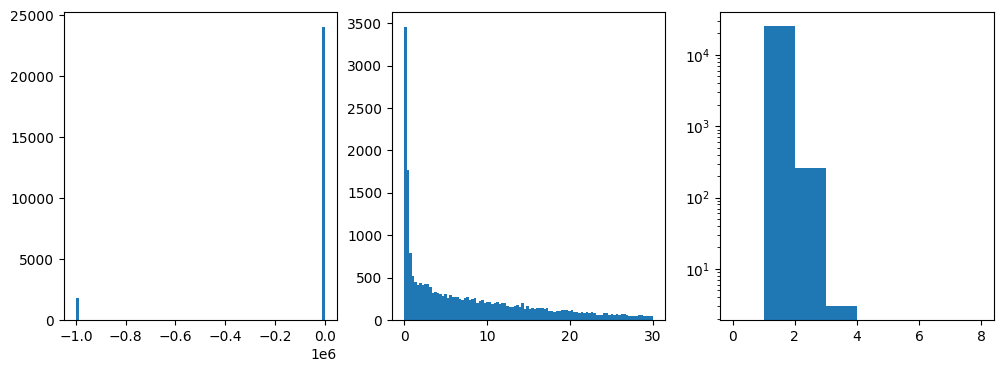

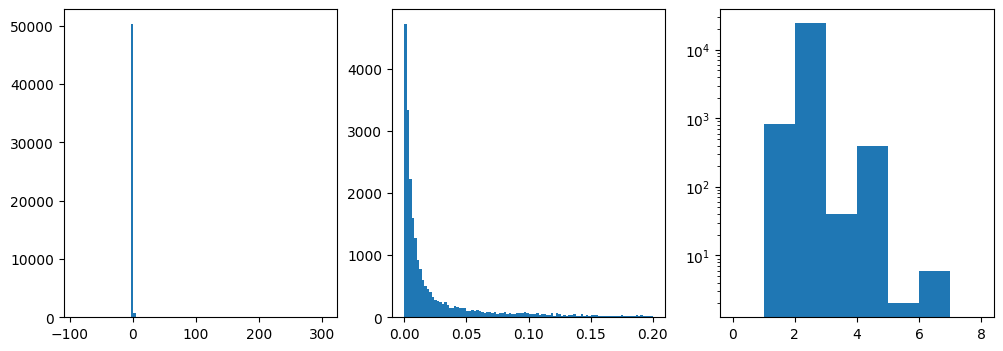

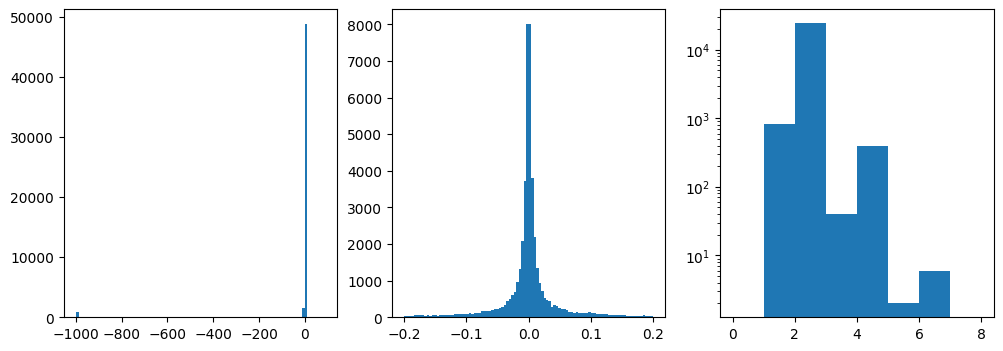

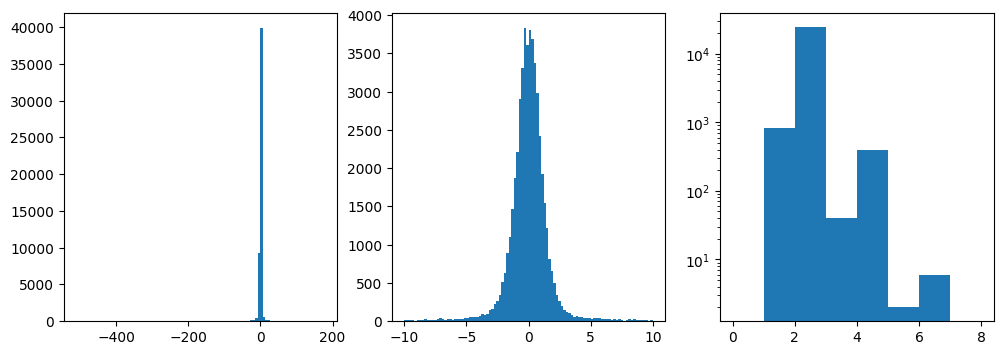

In [53]:
spmask = data['spmode']=='998'
#spmask = data['spmode']=='-999'

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
x = data[spmask]['Lambda0FlightLen']
plt.hist(ak.flatten(x), bins=100)

plt.subplot(1,3,2)
plt.hist(ak.flatten(x), bins=100,range=(0,30))

plt.subplot(1,3,3)
plt.hist(ak.num(x), bins=8,range=(0,8))
plt.yscale('log')



plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
x = data[spmask]['BpostFitFlight']
plt.hist(ak.flatten(x), bins=100)

plt.subplot(1,3,2)
plt.hist(ak.flatten(x), bins=100,range=(0,0.2))

plt.subplot(1,3,3)
plt.hist(ak.num(x), bins=8,range=(0,8))
plt.yscale('log')


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
x = data[spmask]['B_con_postFitFlight']
plt.hist(ak.flatten(x), bins=100)

plt.subplot(1,3,2)
plt.hist(ak.flatten(x), bins=100,range=(-0.2,0.2))

plt.subplot(1,3,3)
plt.hist(ak.num(x), bins=8,range=(0,8))
plt.yscale('log')


#BpostFitFlightSignificance

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
x = data[spmask]['BpostFitFlightSignificance']
plt.hist(ak.flatten(x), bins=100)

plt.subplot(1,3,2)
plt.hist(ak.flatten(x), bins=100,range=(-10,10))

plt.subplot(1,3,3)
plt.hist(ak.num(x), bins=8,range=(0,8))
plt.yscale('log')

;
;

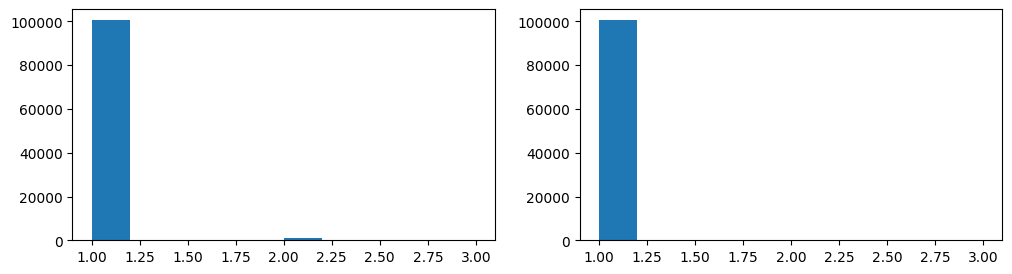

In [12]:
nlam = data['nLambda0']
lamfl = data['Lambda0FlightLen']
lammass= data['Lambda0_unc_Mass']
spmode= data['spmode']


d1idx = data['Lambda0d1Idx']
d2idx = data['Lambda0d2Idx']

d1lund = data['Lambda0d1Lund']
d2lund = data['Lambda0d2Lund']

Bd1idx = data['Bd1Idx']
Bd2idx = data['Bd2Idx']

Bd1lund = data['Bd1Lund']
Bd2lund = data['Bd2Lund']



plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(nlam);

plt.subplot(1,2,2)
plt.hist(nlam[nlam!=2]);

In [13]:
print(lamfl)
print(lammass)
print(spmode)

print()

print(d1idx)
print(d1lund)
print()

print(d2idx)
print(d2lund)
print()

print(Bd1idx)
print(Bd1lund)
print()

print(Bd2idx)
print(Bd2lund)
print()

[[2.58], [25.2], [0.436], [26.1], [29.2], ..., [0.965], [0.338], [30.7], [5.04]]
[[1.12], [1.12], [1.11], [1.12], [1.12], ..., [1.12], [1.11], [1.11], [1.12]]
['998', '998', '998', '998', '998', ..., '-999', '-999', '-999', '-999', '-999']

[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
[[-2212], [2212], [2212], [-2212], ..., [-2212], [-2212], [2212], [-2212]]

[[0], [0], [0], [0], [0], [0], [0], [0], ..., [0], [0], [0], [0], [0], [0], [0]]
[[211], [-211], [-211], [211], [211], ..., [211], [211], [211], [-211], [211]]

[[0, 0], [0, 0], [0, 0], [0, 0], [0, ...], ..., [0, 0], [0, 0], [0, 0], [0, 0]]
[[-3122, -3122], [3122, 3122], [3122, ...], ..., [3122, 3122], [-3122, -3122]]

[[0, 0], [0, 0], [0, 0], [0, 0], [0, ...], ..., [0, 0], [0, 0], [0, 0], [0, 0]]
[[-2212, -2212], [2212, 2212], [2212, ...], ..., [2212, 2212], [-2212, -2212]]



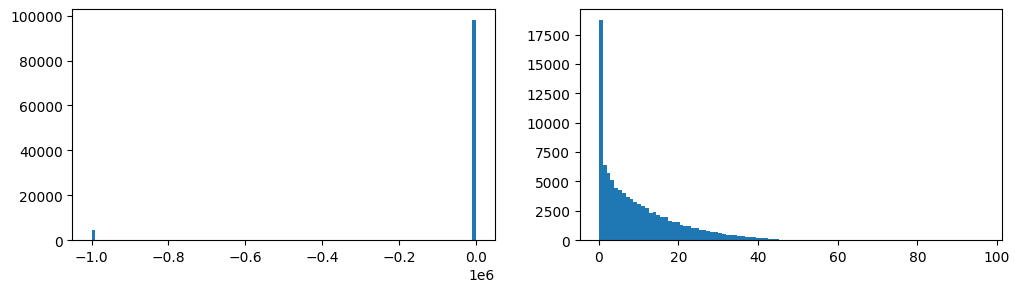

In [14]:
mask = lamfl >= 0

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(ak.flatten(lamfl),bins=100);

plt.subplot(1,2,2)
plt.hist(ak.flatten(lamfl[mask]), bins=100);

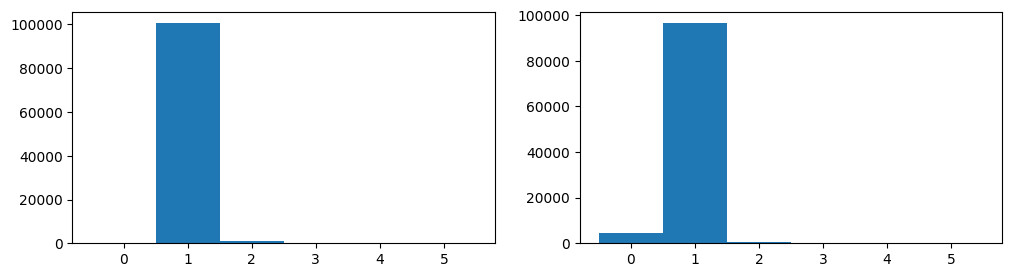

In [15]:
mask = lamfl >= 0

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(ak.num(lamfl), bins=6, range=(-0.5, 5.5));

plt.subplot(1,2,2)
plt.hist(ak.num(lamfl[mask]), bins=6, range=(-0.5, 5.5));

In [16]:
mask = nlam == 2

x1 = d1idx[mask][:,0]
x2 = d1idx[mask][:,1]

x3 = d2idx[mask][:,0]
x4 = d2idx[mask][:,1]

x5 = Bd2idx[mask][:,0]
x6 = Bd2idx[mask][:,1]

x7 = lammass[mask][:,0]
x8 = lammass[mask][:,1]


print(x1)
print(x2)
print()

print("Lambda0 d1")
print(len(x1))
print(len(x1[x1 != x2]))
print(x1[x1 != x2])
print(x2[x1 != x2])
print(spmode[x1 != x2])
print()

print("Lambda0 d2")
print(len(x3))
print(len(x3[x3 != x4]))
print(x3[x3 != x4])
print(x4[x3 != x4])
print(spmode[x3 != x4])
print()

print("B d2 (proton)")
print(len(x5))
print(len(x5[x5 != x6]))
print(x5[x5 != x6])
print(x6[x5 != x6])
print(spmode[x5 != x6])
print()

print("Lambda0 mass")
print(len(x7))
print(len(x7[x7 != x8]))
print(x7[x7 != x8])
print(x8[x7 != x8])


print(x7[x7 != x8][4])
print(x8[x7 != x8][4])

print(x7[x7 != x8][5])
print(x8[x7 != x8][5])

print(x7[x7 != x8][7])
print(x8[x7 != x8][7])


print(spmode[x7 != x8])
print()


[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, ..., 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]

Lambda0 d1
1034
473
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, ..., 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['998', '998', '998', '998', '998', ..., '998', '998', '998', '998', '998']

Lambda0 d2
1034
986
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['998', '998', '998', '998', '998', ..., '998', '998', '998', '998', '998']

B d2 (proton)
1034
410
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['998', '998', '998', '998', '998', ..., '998', '998', '998', '998', '998']

Lambda0 mass
1034
1034
[1.12, 1.11, 1.11, 1.12, 1.12, 1.1

In [17]:
#data.fields

In [18]:
mask = nlam == 2

x1 = d1idx[mask][:,0]
x2 = d1idx[mask][:,1]

x3 = d2idx[mask][:,0]
x4 = d2idx[mask][:,1]

x5 = Bd2idx[mask][:,0]
x6 = Bd2idx[mask][:,1]

x7 = lammass[mask][:,0]
x8 = lammass[mask][:,1]


n = 25

ppmag, pcosth, pphi = data['pp3'], data['pcosth'], data['pphi']
pipmag, picosth, piphi = data['pip3'], data['picosth'], data['piphi']

print(x1[n], x2[n], x6[n] , ppmag[n], pipmag[n], pcosth[n], picosth[n], pphi[n], piphi[n])
#ppmag

1 1 0 [1.62, 3.7] [0.552] [0.13, 0.658] [0.773] [1.04, -1.78] [-1.69]


In [19]:
mask = nlam == 2

print(d1idx[mask])

x1 = d1idx[mask][:,1]

x1

[[1, 2], [1, 2], [1, 0], [1, 1], [1, ...], ..., [1, 1], [1, 0], [1, 1], [1, 1]]


<Array [2, 2, 0, 1, 0, 0, 2, 0, ..., 1, 1, 0, 1, 0, 1, 1] type='1034 * int32'>